In [120]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#  Using different Plotting Packages - Top 10 Companies Ranked by Revenue - Bar chart

* Getting data of List of largest companies in the United States by revenue from wikipedia

In [121]:
url = "https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue"
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of largest companies in the United States by revenue - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientp

In [122]:
soup.find_all('table')

[<table class="wikitable sortable">
 <caption>
 </caption>
 <tbody><tr>
 <th>Rank
 </th>
 <th>Name
 </th>
 <th>Industry
 </th>
 <th>Revenue <br/>(USD millions)
 </th>
 <th>Revenue growth
 </th>
 <th>Employees
 </th>
 <th>Headquarters
 </th></tr>
 <tr>
 <td>1
 </td>
 <td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
 </td>
 <td><a href="/wiki/Retail" title="Retail">Retail</a>
 </td>
 <td style="text-align:center;">648,125
 </td>
 <td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/20px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/40px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.0%
 </td>
 <td style="text-align:center;">2,100,000
 </td>
 <td><a 

In [123]:
soup.find_all('table')[1]

<table class="wikitable sortable">
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD billions)
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Cargill" title="Cargill">Cargill</a>
</td>
<td>Food industry
</td>
<td style="text-align:center;">177
</td>
<td style="text-align:center;">160,000
</td>
<td><a href="/wiki/Minnetonka,_Minnesota" title="Minnetonka, Minnesota">Minnetonka, Minnesota</a>
</td></tr>
<tr>
<td>2
</td>
<td><a class="mw-redirect" href="/wiki/Koch_Industries" title="Koch Industries">Koch Industries</a>
</td>
<td>Conglomerate
</td>
<td style="text-align:center;">125
</td>
<td style="text-align:center;">120,000
</td>
<td><a href="/wiki/Wichita,_Kansas" title="Wichita, Kansas">Wichita, Kansas</a>
</td></tr>
<tr>
<td>3
</td>
<td><a class="mw-redirect" href="/wiki/Publix_Super_Markets" title="Publix Super Markets">Publix Super Markets</a>
</td>
<td>Retail
</td>
<td style="text-align:center;">54.5
</td>


In [124]:
table = soup.find('table', class_='wikitable sortable')
print(table)

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">648,125
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/20px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/40px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.0%
</td>
<td style="text-align:center;">2,100,000
</td>
<td><a href="/wiki/Bentonville,_Arkansa

In [125]:
world_titles = table.find_all('th')
print(world_titles)

[<th>Rank
</th>, <th>Name
</th>, <th>Industry
</th>, <th>Revenue <br/>(USD millions)
</th>, <th>Revenue growth
</th>, <th>Employees
</th>, <th>Headquarters
</th>]


In [126]:
world_table_titles = [title.text.strip() for title in world_titles]
print(world_table_titles)

['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth', 'Employees', 'Headquarters']


* Creating Dataframe

In [127]:
df = pd.DataFrame(columns = world_table_titles)
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [128]:
column_data = table.find_all('tr')
print(column_data)

[<tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>, <tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">648,125
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/20px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/40px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.0%
</td>
<td style="text-align:center;">2,100,000
</td>
<td><a href="/wiki/Bentonville,_Arkansas" title="Bentonville, Arkansas">Bentonville, Arkansas</a>
</

In [129]:
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    length = len(df)
    df.loc[length] = individual_row_data
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
2,3,Apple,Electronics industry,"383,482",-2.8%,"161,000","Cupertino, California"
3,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,"364,482",20.7%,"396,500","Omaha, Nebraska"
...,...,...,...,...,...,...,...
95,96,TIAA,Financials,"45,735",11.8%,"16,023","New York City, New York"
96,97,CHS,Agriculture cooperative,"45,590",-4.6%,"10,609","Inver Grove Heights, Minnesota"
97,98,Bristol-Myers Squibb,Pharmaceutical industry,"45,006",-2.5%,"34,100","New York City, New York"
98,99,Dow Chemical Company,Chemical industry,"44,622",-21.6%,"35,900","Midland, Michigan"


In [130]:
df.shape

(100, 7)

* Copying the data to local file

In [131]:
df.to_csv(r'C:\Users\sahil\Documents\CodeYou-Project\DA_Projects\Learning_To_Plot\companies.csv',index= False)

In [132]:
# Convert the 'Revenue (USD millions)' column to numeric (removing commas)
df['Revenue (USD millions)'] = df['Revenue (USD millions)'].replace(',', '', regex=True).astype(float)

# Take top 10 by revenue
top10 = df.sort_values('Revenue (USD millions)', ascending=False).head(10)


# pandas plot

This is just a basic plotting package that uses a slim version of Matplotlib. The idea is to be able to quickly make plots that you can then transform into better visuals with other packages. They are also useful in a time crunch if you just need a plot. A few easy lines and you're off

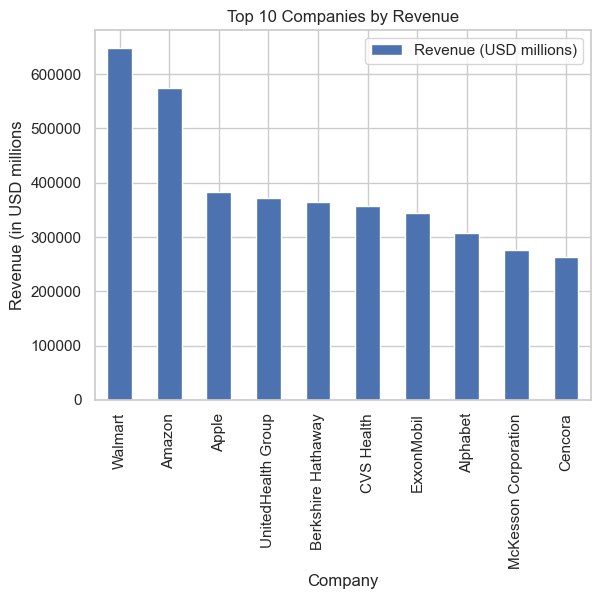

In [133]:
pandas_plot = top10.plot(kind='bar', x='Name', y='Revenue (USD millions)', title='Top 10 Companies by Revenue');
pandas_plot.set_xlabel('Company');
pandas_plot.set_ylabel('Revenue (in USD millions');

# Matplotlib

<Figure size 1200x600 with 0 Axes>

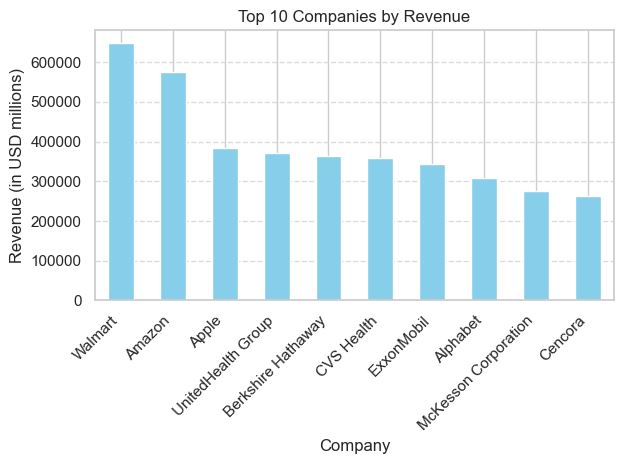

In [134]:
# Plot
plt.figure(figsize=(12, 6))
top10.plot(kind='bar', x='Name', y='Revenue (USD millions)', legend=False, color='skyblue')
plt.title('Top 10 Companies by Revenue')
plt.xlabel('Company')
plt.ylabel('Revenue (in USD millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [135]:
print(top10.dtypes)

Rank                       object
Name                       object
Industry                   object
Revenue (USD millions)    float64
Revenue growth             object
Employees                  object
Headquarters               object
dtype: object


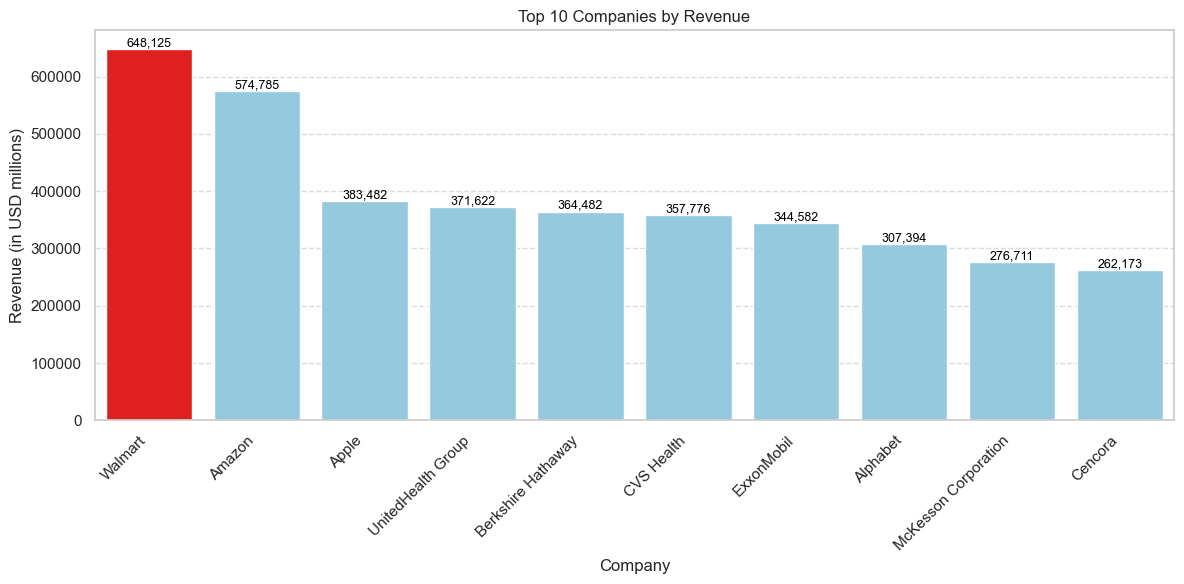

In [136]:
# Set the Seaborn style
sns.set(style="whitegrid")

# Create a color list (example: highlight first company)
colors = ['red' if i == 0 else 'skyblue' for i in range(len(top10))]

# Create a color palette dictionary mapping each company name to a color
palette_dict = dict(zip(top10['Name'], colors))

plt.figure(figsize=(12, 6))

# Create the Seaborn barplot with hue based on the new 'Color' column
# Use 'Name' as both x and hue
ax = sns.barplot(data=top10, x='Name', y='Revenue (USD millions)', hue='Name',
                 palette=palette_dict, legend=False)


# Add value labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black', rotation=0)

plt.title('Top 10 Companies by Revenue')
plt.xlabel('Company')
plt.ylabel('Revenue (in USD millions)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Using only seaborn package

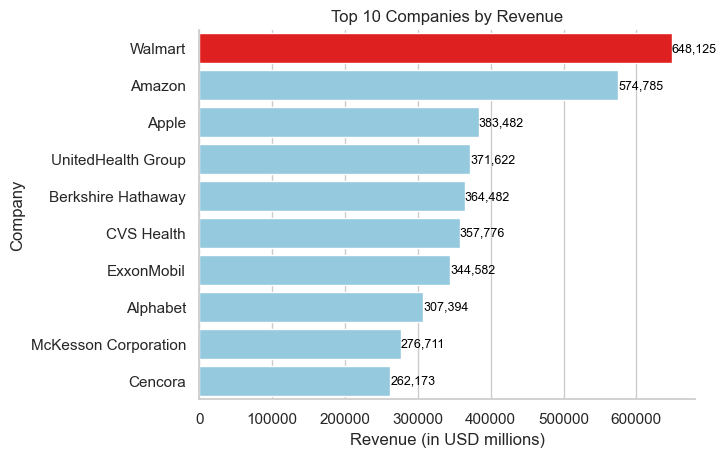

In [137]:
# Set Seaborn theme
sns.set_theme(style="whitegrid")

# Create a color list (highlight first company)
colors = ['red' if i == 0 else 'skyblue' for i in range(len(top10))]

# Map company names to colors
palette_dict = dict(zip(top10['Name'], colors))

# Horizontal barplot
ax = sns.barplot(data=top10, x='Revenue (USD millions)', y='Name',
                 hue='Name', palette=palette_dict, legend=False, orient='h')

# Add value labels
for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=9, color='black')

# Set axis labels and title
ax.set(xlabel='Revenue (in USD millions)', ylabel='Company', title='Top 10 Companies by Revenue')

# Clean up
sns.despine()

# Using plotly

In [138]:

# Create the color list
colors = ['red' if i == 0 else 'skyblue' for i in range(len(top10))]
top10['Color'] = colors

# Create the bar plot using Plotly
fig = px.bar(
    top10,
    x='Name',
    y='Revenue (USD millions)',
    color='Color',  # Use the 'Color' column for the bars
    text='Revenue (USD millions)',  # Show revenue values on bars
    title='Top 10 Companies by Revenue',
    color_discrete_map={'red': 'red', 'skyblue': 'skyblue'},  # Custom colors
)

# Customize the appearance of the plot
fig.update_traces(
    texttemplate='%{text:,.0f}',  # Format text as a number with commas
    textposition='outside',        # Position text outside the bars
    textfont=dict(size=10, color='black'),  # Make text black for better visibility
    marker=dict(line=dict(width=1, color='black'))  # Black border around bars for visibility
)

# Layout settings
fig.update_layout(
    xaxis_title='Company',
    yaxis_title='Revenue (in USD millions)',
    xaxis_tickangle=45,  # Rotate x-axis labels for better fit
    showlegend=False,     # Hide the legend
    plot_bgcolor='white', # Clean background
    yaxis_gridcolor='lightgrey',  # Light gridlines for y-axis
    margin=dict(l=50, r=50, t=50, b=100),  # Adjust margins for spacing
    title=dict(
        x=0.5,             # Center the title horizontally
        xanchor='center'   # Align title to the center
    )
)

# Show the interactive plot
fig.show()
